# PSM on GI Bleed Cohort

## Imports

In [1]:
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *

## Data Prep

In [2]:
df = pd.read_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/ML/GI_Bleed_Tables/albumin_cleaned_for_psm1.csv')

In [3]:
df.shape

(61109, 17)

In [4]:
df.albumin_24hrs.value_counts()

0.0    55915
1.0     5194
Name: albumin_24hrs, dtype: int64

In [5]:
#df.drop(columns = ['bl_albumin_value', 'albumin_lab_baseline_severity'], inplace=True)

In [6]:
df.head()

personid                           encounterid  \
0  001c4742-8e99-4929-9b1c-0b8c6f3e230a  4f8fae0f-a286-4120-b78c-c60086d95f88   
1  019634ce-13e2-4f8c-9f7f-ba5fba461d1f  9f6f2d9f-2534-4e4b-b9c3-9eece9c44e3a   
2  10b58aae-9abd-40f6-b1ed-fb394b5a8e57  2f9f4bd9-bd8b-4c61-a734-b5892bcc96fb   
3  138a5556-63ee-4e60-b826-e1dc72628a0a  57dc97c2-2c28-43a1-8c15-bf7d918c6adc   
4  1df390c3-18b8-41b0-acd9-23495059e97a  83aedaea-94b0-405c-a1ea-94fee7f50b52   

   ICU  mass_transfusion  total_transfusions  anemia_status  CCI  \
0    1                 0                   1            2.0    6   
1    1                 1                   0            0.0    4   
2    0                 0                   0            1.0    3   
3    0                 0                   0            3.0    2   
4    1                 0                   0            0.0    4   

   bl_albumin_value  albumin_24hrs  qSOFA  Cirrhosis  beta_blocker  \
0               2.9            0.0      1          0             1   
1               3.1            0.0      0          1             0   
2               2.2            0.0      0          1             0   
3               1.5            0.0      0          1             0   
4               3.5            1.0      1          0             1   

   hemorrhagic    LOS_hours  30_day_mortality  30_day_readmission  SAPS  
0            0  1016.016667                 0                   0    34  
1            0   531.133333                 0                   1    18  
2            0   388.650000                 0                   0    29  
3            0   135.266667                 0                   0    43  
4            0   343.133333                 0                   1    34

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61109 entries, 0 to 61108
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   personid            61109 non-null  object 
 1   encounterid         61109 non-null  object 
 2   ICU                 61109 non-null  int64  
 3   mass_transfusion    61109 non-null  int64  
 4   total_transfusions  61109 non-null  int64  
 5   anemia_status       61109 non-null  float64
 6   CCI                 61109 non-null  int64  
 7   bl_albumin_value    61109 non-null  float64
 8   albumin_24hrs       61109 non-null  float64
 9   qSOFA               61109 non-null  int64  
 10  Cirrhosis           61109 non-null  int64  
 11  beta_blocker        61109 non-null  int64  
 12  hemorrhagic         61109 non-null  int64  
 13  LOS_hours           61109 non-null  float64
 14  30_day_mortality    61109 non-null  int64  
 15  30_day_readmission  61109 non-null  int64  
 16  SAPS

## Look at outcomes distributions between patients who did and didn't receive albumin within 24 hrs

In [7]:
df[df['albumin_24hrs'] == 1].LOS_hours.describe()

count    5194.000000
mean      271.705178
std       232.426587
min         7.666667
25%       111.766667
50%       192.904583
75%       355.579167
max      1292.800000
Name: LOS_hours, dtype: float64

In [8]:
df[df['albumin_24hrs'] == 0].LOS_hours.describe()

count    55915.000000
mean       196.612228
std        193.344944
min          1.200000
25%         76.500000
50%        124.910833
75%        236.558333
max       1292.900000
Name: LOS_hours, dtype: float64

In [9]:
df[df['albumin_24hrs'] == 1]['30_day_mortality'].value_counts()

0    4103
1    1091
Name: 30_day_mortality, dtype: int64

In [20]:
print((1091/(1091+4103)) * 100)

21.005005775895263


In [10]:
df[df['albumin_24hrs'] == 0]['30_day_mortality'].value_counts()

0    51769
1     4146
Name: 30_day_mortality, dtype: int64

In [21]:
print((4146/(4146+51769)) * 100)

7.414826075292854


In [16]:
df[df['albumin_24hrs'] == 1]['30_day_readmission'].value_counts()

0    3523
1    1671
Name: 30_day_readmission, dtype: int64

In [22]:
print((1671/(1671+4103)) * 100)

28.940076203671634


In [25]:
df[df['albumin_24hrs'] == 0]['30_day_readmission'].value_counts()

0    39329
1    16586
Name: 30_day_readmission, dtype: int64

In [26]:
print((16586/(16586 + 39329)) * 100)

29.662881158901904


In [7]:
df_a24 = df[['personid', 'encounterid', 'LOS_hours', '30_day_mortality', '30_day_readmission']]

In [8]:
df_a24.head()

personid                           encounterid  \
0  001c4742-8e99-4929-9b1c-0b8c6f3e230a  4f8fae0f-a286-4120-b78c-c60086d95f88   
1  019634ce-13e2-4f8c-9f7f-ba5fba461d1f  9f6f2d9f-2534-4e4b-b9c3-9eece9c44e3a   
2  10b58aae-9abd-40f6-b1ed-fb394b5a8e57  2f9f4bd9-bd8b-4c61-a734-b5892bcc96fb   
3  138a5556-63ee-4e60-b826-e1dc72628a0a  57dc97c2-2c28-43a1-8c15-bf7d918c6adc   
4  1df390c3-18b8-41b0-acd9-23495059e97a  83aedaea-94b0-405c-a1ea-94fee7f50b52   

     LOS_hours  30_day_mortality  30_day_readmission  
0  1016.016667                 0                   0  
1   531.133333                 0                   1  
2   388.650000                 0                   0  
3   135.266667                 0                   0  
4   343.133333                 0                   1

In [9]:
#df.drop(columns=['personid', 'encounterid', 'albumin_24'], inplace=True)

In [10]:
df.shape

(61109, 17)

In [11]:
df.head()

personid                           encounterid  \
0  001c4742-8e99-4929-9b1c-0b8c6f3e230a  4f8fae0f-a286-4120-b78c-c60086d95f88   
1  019634ce-13e2-4f8c-9f7f-ba5fba461d1f  9f6f2d9f-2534-4e4b-b9c3-9eece9c44e3a   
2  10b58aae-9abd-40f6-b1ed-fb394b5a8e57  2f9f4bd9-bd8b-4c61-a734-b5892bcc96fb   
3  138a5556-63ee-4e60-b826-e1dc72628a0a  57dc97c2-2c28-43a1-8c15-bf7d918c6adc   
4  1df390c3-18b8-41b0-acd9-23495059e97a  83aedaea-94b0-405c-a1ea-94fee7f50b52   

   ICU  mass_transfusion  total_transfusions  anemia_status  CCI  \
0    1                 0                   1            2.0    6   
1    1                 1                   0            0.0    4   
2    0                 0                   0            1.0    3   
3    0                 0                   0            3.0    2   
4    1                 0                   0            0.0    4   

   bl_albumin_value  albumin_24hrs  qSOFA  Cirrhosis  beta_blocker  \
0               2.9            0.0      1          0             1   
1               3.1            0.0      0          1             0   
2               2.2            0.0      0          1             0   
3               1.5            0.0      0          1             0   
4               3.5            1.0      1          0             1   

   hemorrhagic    LOS_hours  30_day_mortality  30_day_readmission  SAPS  
0            0  1016.016667                 0                   0    34  
1            0   531.133333                 0                   1    18  
2            0   388.650000                 0                   0    29  
3            0   135.266667                 0                   0    43  
4            0   343.133333                 0                   1    34

## Initialize PsmPy Class

In [15]:
psm = PsmPy(df, treatment= 'albumin_24hrs', indx='encounterid', exclude = ['personid', 'LOS_hours', '30_day_mortality', '30_day_readmission'])

In [16]:
%%time
psm.logistic_ps(balance = True)

Wall time: 57.1 s


In [17]:
df_psm = psm.predicted_data

In [18]:
df_psm.head()

encounterid  ICU  mass_transfusion  \
0  83aedaea-94b0-405c-a1ea-94fee7f50b52    1                 0   
1  b08d47a1-2a9e-4b7a-b008-f71641dcb93a    0                 0   
2  a3756a81-c2d1-41bd-831d-cc65e73299c6    1                 1   
3  d58ab90d-6928-4e32-af06-c3479e437faa    0                 0   
4  008fb547-53e0-467e-92b2-590982e390b8    1                 0   

   total_transfusions  anemia_status  CCI  bl_albumin_value  qSOFA  Cirrhosis  \
0                   0            0.0    4               3.5      1          0   
1                   0            0.0    2               3.9      0          0   
2                   0            0.0    1               3.5      1          0   
3                   0            2.0    4               2.2      0          1   
4                   1            2.0    6               3.3      1          0   

   beta_blocker  hemorrhagic  SAPS  propensity_score  propensity_logit  \
0             1            0    34          0.492114         -0.031547   
1             1            0    41          0.296393         -0.864535   
2             0            0    29          0.615716          0.471403   
3             1            1    31          0.784942          1.294700   
4             1            1    20          0.509232          0.036933   

   albumin_24hrs  
0              1  
1              1  
2              1  
3              1  
4              1

## Plot the propensity score / propensity logits

In [19]:
%%time
psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Wall time: 3h 34min 30s


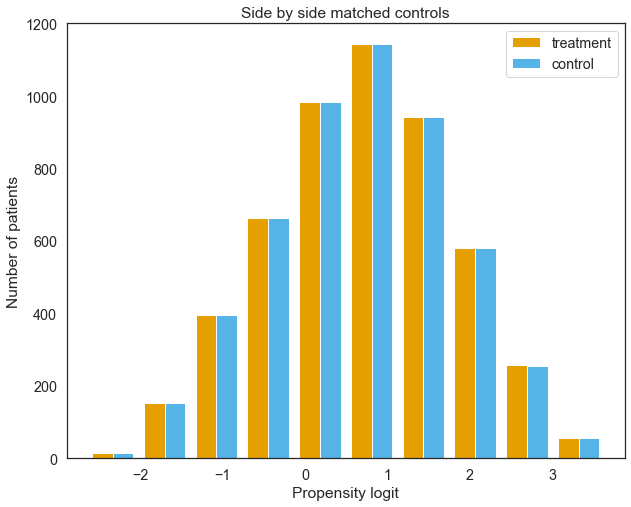

In [20]:
psm.plot_match(Title='Side by side matched controls', Ylabel='Number of patients', Xlabel= 'Propensity logit', names = ['treatment', 'control'], save=True)

## Plot the effect sizes

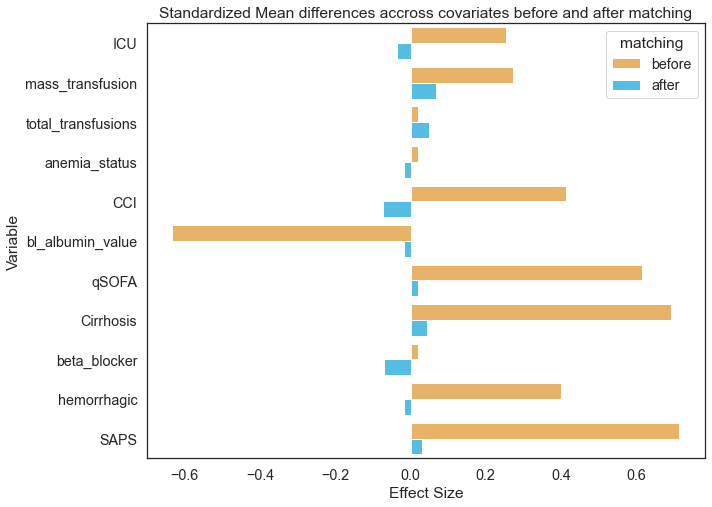

In [22]:
psm.effect_size_plot(save=False)

## Raw Dataframe

In [23]:
matched_df = psm.df_matched

In [24]:
matched_df.head()

encounterid  ICU  mass_transfusion  \
0  83aedaea-94b0-405c-a1ea-94fee7f50b52    1                 0   
1  b08d47a1-2a9e-4b7a-b008-f71641dcb93a    0                 0   
2  a3756a81-c2d1-41bd-831d-cc65e73299c6    1                 1   
3  d58ab90d-6928-4e32-af06-c3479e437faa    0                 0   
4  008fb547-53e0-467e-92b2-590982e390b8    1                 0   

   total_transfusions  anemia_status  CCI  bl_albumin_value  qSOFA  Cirrhosis  \
0                   0            0.0    4               3.5      1          0   
1                   0            0.0    2               3.9      0          0   
2                   0            0.0    1               3.5      1          0   
3                   0            2.0    4               2.2      0          1   
4                   1            2.0    6               3.3      1          0   

   beta_blocker  hemorrhagic  SAPS  propensity_score  propensity_logit  \
0             1            0    34          0.492114         -0.031547   
1             1            0    41          0.296393         -0.864535   
2             0            0    29          0.615716          0.471403   
3             1            1    31          0.784942          1.294700   
4             1            1    20          0.509232          0.036933   

   albumin_24hrs  
0              1  
1              1  
2              1  
3              1  
4              1

In [25]:
matched_df.shape

(10388, 15)

## Matched Ids

In [26]:
ids_df = psm.matched_ids
ids_df.head()

encounterid                            matched_ID
0  83aedaea-94b0-405c-a1ea-94fee7f50b52  94d130a9-f877-4c01-9972-b8ad3d062d97
1  b08d47a1-2a9e-4b7a-b008-f71641dcb93a  abb78e22-c9e6-40f9-a538-2a90b6d8709e
2  a3756a81-c2d1-41bd-831d-cc65e73299c6  a29bcf55-76a3-4235-9478-20005e971a3f
3  d58ab90d-6928-4e32-af06-c3479e437faa  3d58cdca-b51c-4bda-901b-5b3f401dc46f
4  008fb547-53e0-467e-92b2-590982e390b8  0b0110ee-76e0-43ed-81ea-16f6158cdc26

## Effect sizes per variables

In [27]:
psm.effect_size

Variable matching  Effect Size
0                  ICU   before     0.253541
1                  ICU    after    -0.036119
2     mass_transfusion   before     0.271523
3     mass_transfusion    after     0.067438
4   total_transfusions   before     0.019617
5   total_transfusions    after     0.048473
6        anemia_status   before     0.019765
7        anemia_status    after    -0.017876
8                  CCI   before     0.413914
9                  CCI    after    -0.072532
10    bl_albumin_value   before    -0.633661
11    bl_albumin_value    after    -0.016702
12               qSOFA   before     0.614010
13               qSOFA    after     0.019257
14           Cirrhosis   before     0.692198
15           Cirrhosis    after     0.043651
16        beta_blocker   before     0.020627
17        beta_blocker    after    -0.069340
18         hemorrhagic   before     0.398762
19         hemorrhagic    after    -0.017340
20                SAPS   before     0.714853
21                SAPS    after     0.030220

## Explore Matched df

In [28]:
matched_df.head()

encounterid  ICU  mass_transfusion  \
0  83aedaea-94b0-405c-a1ea-94fee7f50b52    1                 0   
1  b08d47a1-2a9e-4b7a-b008-f71641dcb93a    0                 0   
2  a3756a81-c2d1-41bd-831d-cc65e73299c6    1                 1   
3  d58ab90d-6928-4e32-af06-c3479e437faa    0                 0   
4  008fb547-53e0-467e-92b2-590982e390b8    1                 0   

   total_transfusions  anemia_status  CCI  bl_albumin_value  qSOFA  Cirrhosis  \
0                   0            0.0    4               3.5      1          0   
1                   0            0.0    2               3.9      0          0   
2                   0            0.0    1               3.5      1          0   
3                   0            2.0    4               2.2      0          1   
4                   1            2.0    6               3.3      1          0   

   beta_blocker  hemorrhagic  SAPS  propensity_score  propensity_logit  \
0             1            0    34          0.492114         -0.031547   
1             1            0    41          0.296393         -0.864535   
2             0            0    29          0.615716          0.471403   
3             1            1    31          0.784942          1.294700   
4             1            1    20          0.509232          0.036933   

   albumin_24hrs  
0              1  
1              1  
2              1  
3              1  
4              1

In [30]:
matched_df.albumin_24hrs.value_counts()

1    5194
0    5194
Name: albumin_24hrs, dtype: int64

In [31]:
matched_df.shape

(10388, 15)

## Join Matched df with earlier df on encounterid to add outcome variables

In [32]:
f_df = matched_df.merge(df_a24, on='encounterid', how='left')

In [33]:
f_df.shape

(10388, 19)

In [34]:
f_df.head()

encounterid  ICU  mass_transfusion  \
0  83aedaea-94b0-405c-a1ea-94fee7f50b52    1                 0   
1  b08d47a1-2a9e-4b7a-b008-f71641dcb93a    0                 0   
2  a3756a81-c2d1-41bd-831d-cc65e73299c6    1                 1   
3  d58ab90d-6928-4e32-af06-c3479e437faa    0                 0   
4  008fb547-53e0-467e-92b2-590982e390b8    1                 0   

   total_transfusions  anemia_status  CCI  bl_albumin_value  qSOFA  Cirrhosis  \
0                   0            0.0    4               3.5      1          0   
1                   0            0.0    2               3.9      0          0   
2                   0            0.0    1               3.5      1          0   
3                   0            2.0    4               2.2      0          1   
4                   1            2.0    6               3.3      1          0   

   beta_blocker  hemorrhagic  SAPS  propensity_score  propensity_logit  \
0             1            0    34          0.492114         -0.031547   
1             1            0    41          0.296393         -0.864535   
2             0            0    29          0.615716          0.471403   
3             1            1    31          0.784942          1.294700   
4             1            1    20          0.509232          0.036933   

   albumin_24hrs                              personid   LOS_hours  \
0              1  1df390c3-18b8-41b0-acd9-23495059e97a  343.133333   
1              1  1f7e4dd3-9985-4039-8099-ecea6ec7b94d  333.866667   
2              1  3cc07cf0-d9b1-486a-a33f-7a0db69304dd   23.400000   
3              1  3e61e48c-91d7-466b-8dff-89c791002dc6  239.300000   
4              1  43c7671f-8311-40d6-861f-91e668874c01  173.100000   

   30_day_mortality  30_day_readmission  
0                 0                   1  
1                 0                   0  
2                 1                   0  
3                 0                   1  
4                 0                   0

In [35]:
f_df.to_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/ML/GI_Bleed_Tables/blood_diseases_matched_alb_24h_full.csv', index=False)